In [60]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

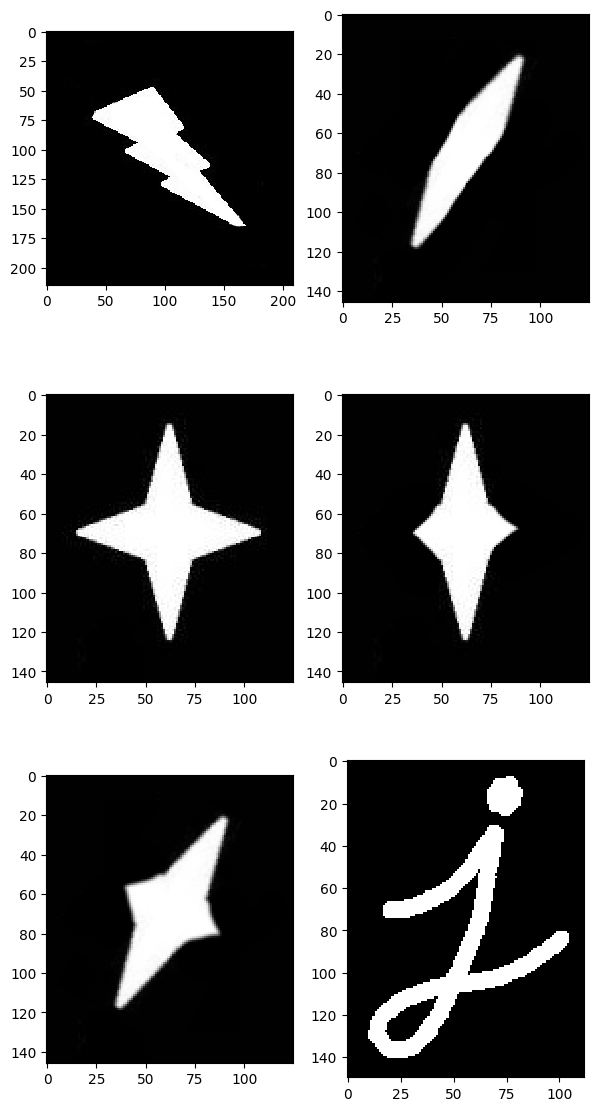

In [41]:
lightningbolt      = cv.imread('shapes/lightningbolt.png', cv.IMREAD_GRAYSCALE)
blob               = cv.imread('shapes/blob.png', cv.IMREAD_GRAYSCALE)
star               = cv.imread('shapes/star.png', cv.IMREAD_GRAYSCALE)
squishedstar       = cv.imread('shapes/squishedstar.png', cv.IMREAD_GRAYSCALE)
squishedturnedstar = cv.imread('shapes/squishedturnedstar.png', cv.IMREAD_GRAYSCALE)
letterj            = cv.imread('shapes/letterj.png', cv.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [42]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [43]:
# 255, because white is the brightest color. 

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


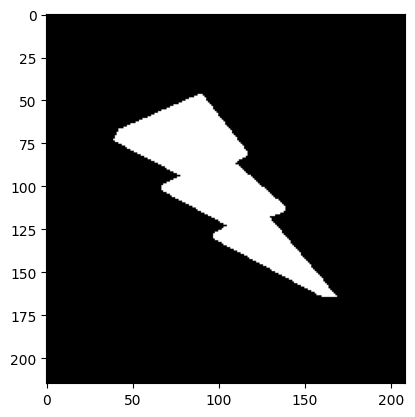

In [44]:
_, lightningbolt = cv.threshold(lightningbolt,200,255,cv.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [45]:
# A good threshold value for the above image is 200

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

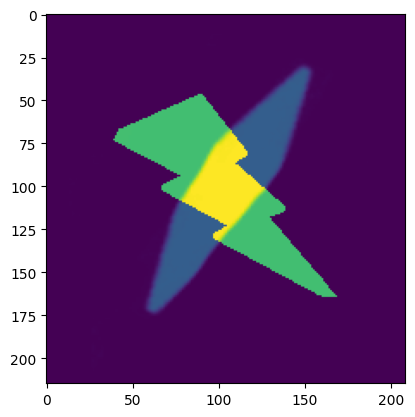

In [46]:
blob_r = cv.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
dst = cv.addWeighted(lightningbolt,0.7,blob_r,0.3,0)
plt.imshow(dst)

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

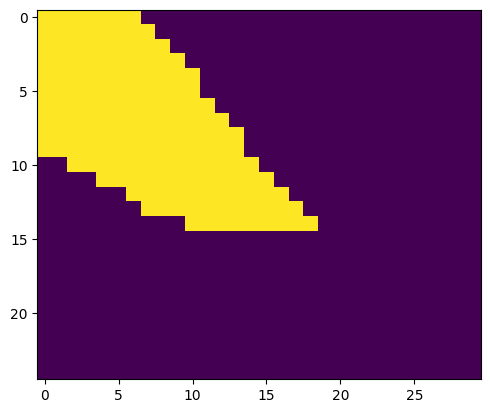

In [47]:
bolt_zoom = lightningbolt[150:175, 150:180]
plt.imshow(bolt_zoom)

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

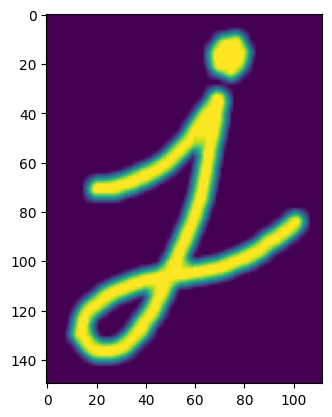

In [48]:
blur = cv.blur(letterj,(5,5))
plt.imshow(blur)

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

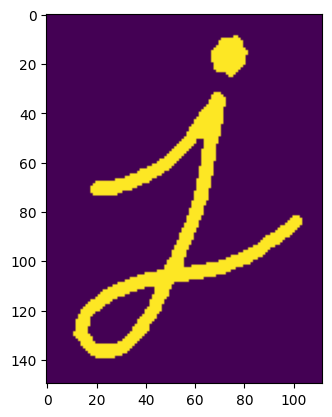

In [49]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion)

## 5. Perform erosion on j with a 5x5 kernel

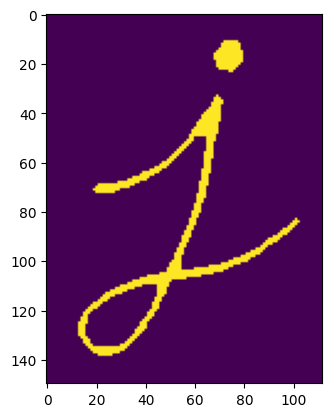

In [50]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion)

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



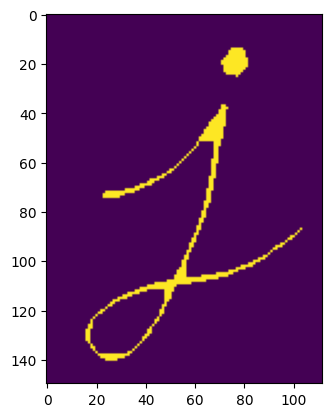

In [51]:
kernel = np.ones((2,2),np.uint8)
erosion = cv.erode(letterj,kernel,iterations = 5)
plt.imshow(erosion)

## 7. Perform dilation on j with a 3x3 kernel

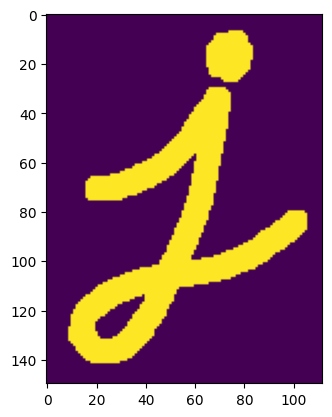

In [52]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.dilate(letterj,kernel,iterations = 1)
plt.imshow(erosion)

## 8. Perform dilation on j with a 5x5 kernel

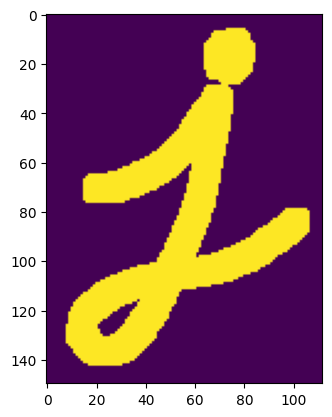

In [53]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.dilate(letterj,kernel,iterations = 1)
plt.imshow(erosion)

## 9. What is the effect of kernel size on morphology operations?

In [54]:
# it determines how sharp or pixelated the image becomes

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [55]:
# Repeated small kernels are slower but more controlled, finer control

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

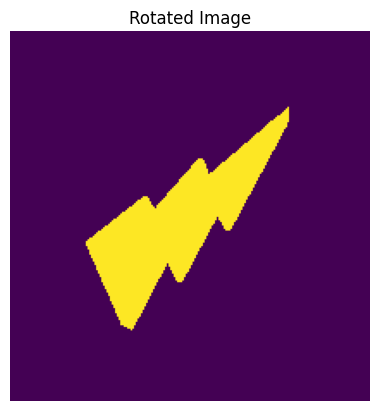

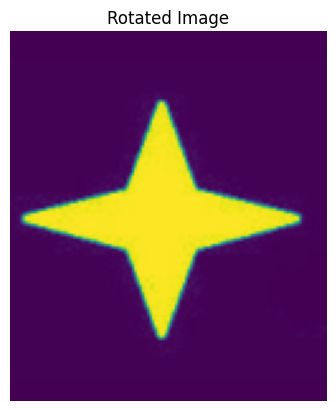

In [56]:
rows, cols = lightningbolt.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

rows, cols = star.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv.warpAffine(star, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()


## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

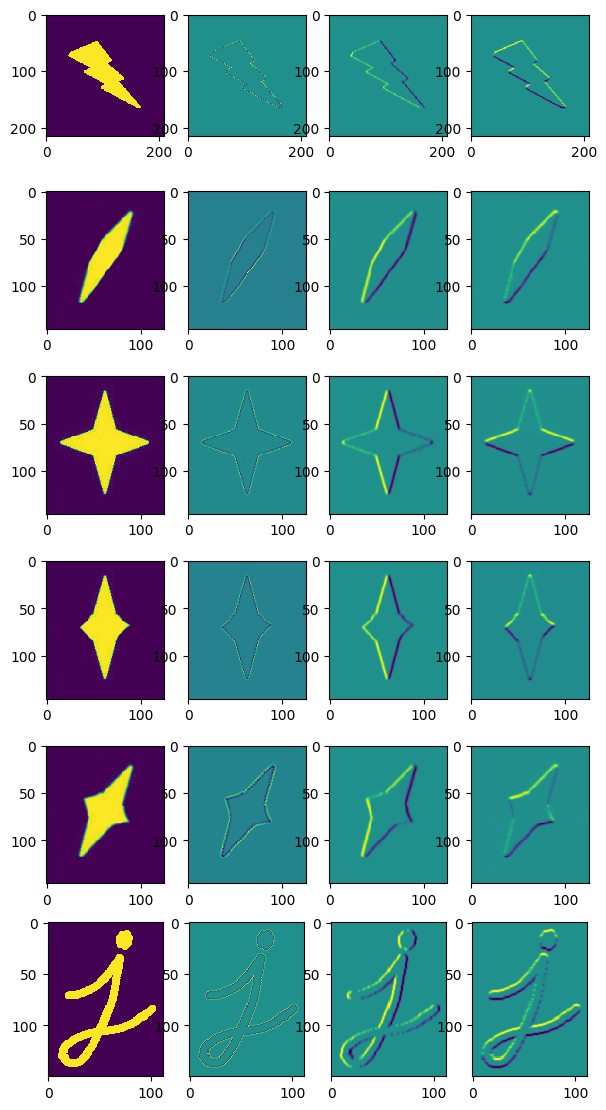

In [71]:
ls = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]
ls_print = []

for img in ls:
    laplacian = cv.Laplacian(img,cv.CV_64F)
    sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
    sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
    ls_print.append(img)
    ls_print.append(laplacian)
    ls_print.append(sobelx)
    ls_print.append(sobely)

fig,ax = plt.subplots(nrows=6, ncols=4)
for a,i in zip(ax.flatten(), ls_print):
    a.imshow(i, interpolation='none');
fig.set_size_inches(7,14);